# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx
import misc
import math
import random
import SmallBucket
import BigBucket
import RandomWarmUp1
import RandomWarmUp2
import StaticDynamic
import DcOrient

# Data Generation

In [2]:
#Create empty graph
G = nx.Graph()

In [3]:
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

G.add_edges_from([
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (6,7),
    (7,8),
    (8,9),
    (9,0),

    (0,2),
    (0,3),
    (0,4),
    (1,3)
])

In [4]:
G = nx.Graph()

In [5]:
G = misc.createRandomGraph(size=30, density=0.4, maxDegree=1000)
misc.graphInfo(G)

Chosen max degree does not fall into range (4, 16) permitted by other parameters, so picking closest value instead
Nodes: 17
Edges: 34
Density: 0.25
Max Degree: 16
Average Degree: 4.0
Static Coloring uses 4 colors


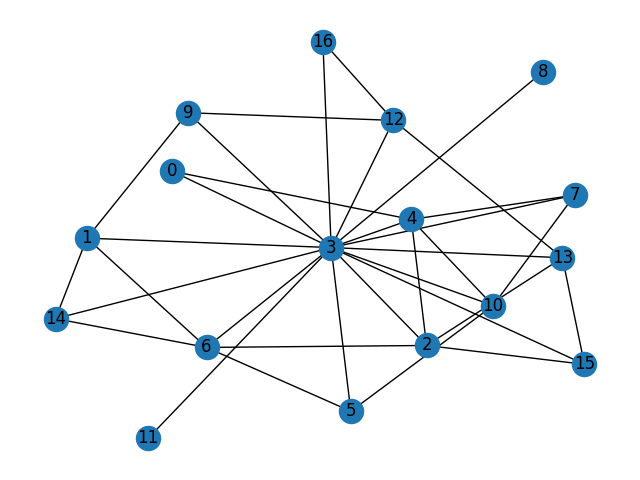

In [6]:
misc.draw(G)

# Common items

In [7]:
# Returns a coloring dictionary from the nodes 'color' attributes
def getColoring() -> dict:
    coloring: dict = {}
    for node in Gstar.nodes():
        coloring[node] = Gstar.nodes[node]['color']
    return coloring

In [8]:
# Print the current situation of the leveled segment data structure
def printLevels():
    print("l: " + str(l))
    print("c: " + str(c))

# Algorithm Specific Methods

In [9]:
def removeEdge(s, t):
    if not G.has_edge(s, t):    # Potentially redundant
        print("Edge not present in graph")
        return
    G.remove_edge(s, t)
    dcOrientDelete(s, t)

def removeVertex(v):

    if not G.has_node(v):   # Potentially redundant
        print("Node not present in graph")
        return
    G.remove_node(v)
    Gstar.remove_node(v)

def addEdge(s, t):

    if G.has_edge(s, t):    # Potentially redundant, but could be extended to also check if the vertices are present yet
        print("Edge already in the graph")
        return
    if (not G.has_node(s) or not G.has_node(t)):
        print("Not all nodes present in graph yet")
        return
    G.add_edge(s, t)
    dcOrientInsert(s,t)

def addVertex(v):
    if G.has_node(v):   # Potentially redundant, depending on the input used during the experiments
        print("Node already present in graph")
        return
    G.add_node(v)
    Gstar.add_node(v)
    Gstar.nodes[v]['color'] = 0
    Gstar.nodes[v]['DINC'] = DincIndex()

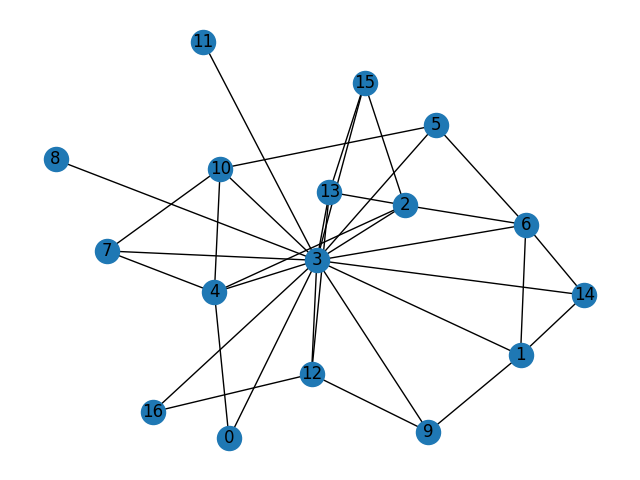

In [10]:
misc.draw(G)

In [11]:
updates = misc.extractUpdates(G, 'random')


In [12]:
Gp = nx.Graph()
Gp.add_nodes_from(G.nodes())
dco = DcOrient.DcOrientAlgo(Gp)
iterator = misc.UpdateIterator(dco, updates)

In [13]:
dco.Gstar.nodes[15]['DINC'].cu

set()

executing CAN step for node 3
cu is set()
cnt is {}
executing CAN step for node 5
cu is set()
cnt is {0: 1}
1
True
I.cnt is {0: 1}
decreasing color 0
I.cnt is {}
I.cu is {0}
executing CAN step for node 5
cu is {0}
cnt is {}
letting 6 know about color update
I.cnt is {1: 1}
decreasing color 1
I.cnt is {}
I.cu is set()
Node 6 now has cnt {0: 1}
letting 3 know about color update
I.cnt is {1: 1}
decreasing color 1
I.cnt is {}
I.cu is set()
Node 3 now has cnt {0: 1}
executing CAN step for node 3
cu is set()
cnt is {0: 1}
executing CAN step for node 6
cu is set()
cnt is {0: 1}
2
True
I.cnt is {0: 1}
decreasing color 0
I.cnt is {}
I.cu is {0}
executing CAN step for node 3
cu is {0}
cnt is {}
letting 14 know about color update
I.cnt is {1: 1}
decreasing color 1
I.cnt is {}
I.cu is set()
Node 14 now has cnt {0: 1}
letting 5 know about color update
I.cnt is {1: 1}
decreasing color 1
I.cnt is {}
I.cu is set()
Node 5 now has cnt {0: 1}
executing CAN step for node 5
cu is set()
cnt is {0: 1}
lettin

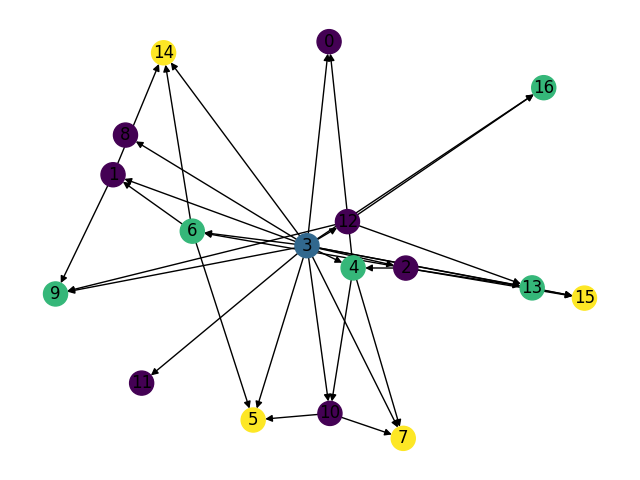

In [14]:
c1 = dco.getColoring()

while misc.verifyColoring(dco.G, dco.getColoring()):
    if iterator.runUpdate(1):
        c2 = dco.getColoring()
        print(misc.numberOfRecolors(c1, c2))
        print(misc.verifyColoring(dco.G, dco.getColoring()))
    else:
        print("all updates finished")
        break

misc.draw(dco.Gstar, dco.getColoring())


In [15]:
dco.getColoring()

{0: 1,
 1: 1,
 2: 1,
 3: 0,
 4: 2,
 5: 3,
 6: 2,
 7: 3,
 8: 1,
 9: 2,
 10: 1,
 11: 1,
 12: 1,
 13: 2,
 14: 3,
 15: 3,
 16: 2}

In [16]:
misc.verifyColoring(dco.G, dco.getColoring())

True

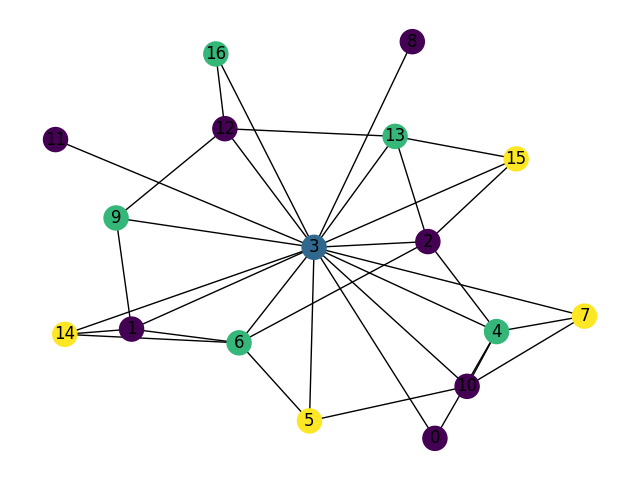

In [17]:
misc.draw(dco.G, dco.getColoring())

In [18]:
misc.numberOfColors(dco.getColoring())

4

In [19]:
Ge = nx.Graph()
Ge.add_nodes_from(G.nodes())
edges = list(G.edges())

In [20]:
misc.numberOfColors(nx.coloring.greedy_color(dco.G))

4

In [21]:
misc.extractUpdates(G, 'skewed')

[(3, 13),
 (3, 6),
 (2, 3),
 (3, 11),
 (3, 12),
 (0, 3),
 (3, 16),
 (3, 5),
 (3, 15),
 (3, 7),
 (3, 14),
 (3, 8),
 (3, 4),
 (1, 3),
 (3, 9),
 (12, 13),
 (13, 15),
 (7, 10),
 (3, 10),
 (2, 13),
 (2, 4),
 (1, 14),
 (4, 7),
 (2, 15),
 (9, 12),
 (4, 10),
 (1, 9),
 (5, 10),
 (1, 6),
 (2, 6),
 (5, 6),
 (6, 14),
 (12, 16),
 (0, 4)]

In [22]:
sda = StaticDynamic.StaticDynamicAlgo(Ge, 2, True)
layout = nx.spring_layout(G)
updi = misc.UpdateIterator(sda, misc.extractUpdates(G, 'skewed'))

full reset


No more updates in given update sequence
True


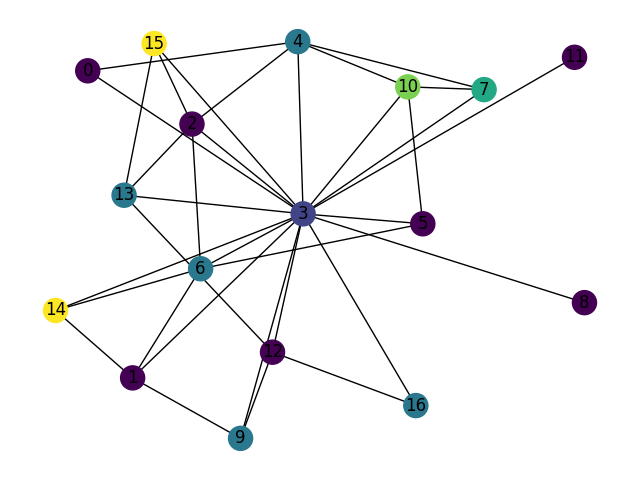

In [53]:
updi.runUpdate(1)
print(misc.verifyColoring(updi.G, updi.getColoring()))
misc.draw(updi.G, updi.getColoring())

In [47]:
updi.algo.DBB.getColoring()

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0}